In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
import tqdm
import warnings
warnings.filterwarnings('ignore')

# Setting ongoing plot size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

# Necessary for plots later
pd.plotting.register_matplotlib_converters()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-darkgrid')

In [4]:
# Getting a look at the raw data
df = pd.read_csv('Data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [5]:
# Dropping the SizeRank column, as well as the RegionID
df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

# Rename RegionName to zipcode
df.rename(columns = {'RegionName' : 'zipcode'}, inplace = True)

# Melting dataframe to convert into Long Format
df2 = pd.melt(df, id_vars=['zipcode', 'City', 'State', 'Metro', 'CountyName'], var_name='date')
df2.head()

,zipcode,City,State,Metro,CountyName,date,value
0,60657,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936,El Paso,TX,El Paso,El Paso,1996-04,77300.0


In [28]:
df2.zipcode.nunique()

556

In [30]:
df2[df2['zipcode'] == 60657].shape

(265, 7)

In [6]:
# Converting 'date' column to datetime format
df2.date = pd.to_datetime(df2.date, format='%Y-%m')

# checking 'value' column for missing data:
df2.isna().sum()

zipcode          0
City             0
State            0
Metro         1060
CountyName       0
date             0
value         1381
dtype: int64

In [7]:
# Grouping the data by zipcode
groups = df2.groupby('zipcode')

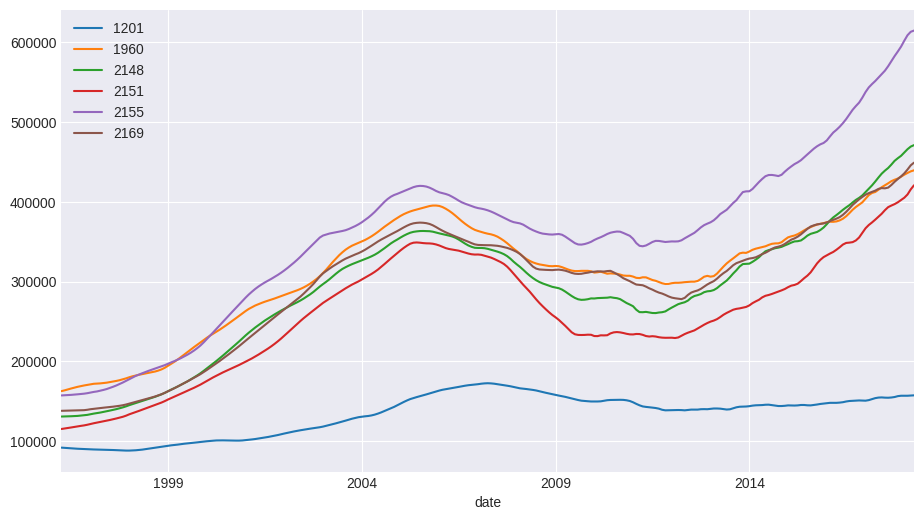

In [6]:
# A quick look at the first 6 zipcodes:
for i, (name, group) in enumerate(groups):
    group.set_index('date').value.plot(figsize=(11,6), label=name)
    if i >= 5:
        break

plt.legend()
plt.show()

In [8]:
# Importing the price-to-rent data
p2r = pd.read_csv('Data/price_2_rent.csv')
p2r.head()

,Region Name,Region Name (group),National Average,P2R,Zhvi
0,"Yuma, AZ",Other,11.44,12.18,"$134,200"
1,"Yuba City, CA",Other,11.44,14.90,"$249,400"
2,"Youngstown, OH",Other,11.44,8.86,"$85,400"
3,"York, PA",Other,11.44,10.55,"$163,600"
4,"Yakima, WA",Other,11.44,13.51,"$181,700"


In [33]:
df2.zipcode.min()

1201

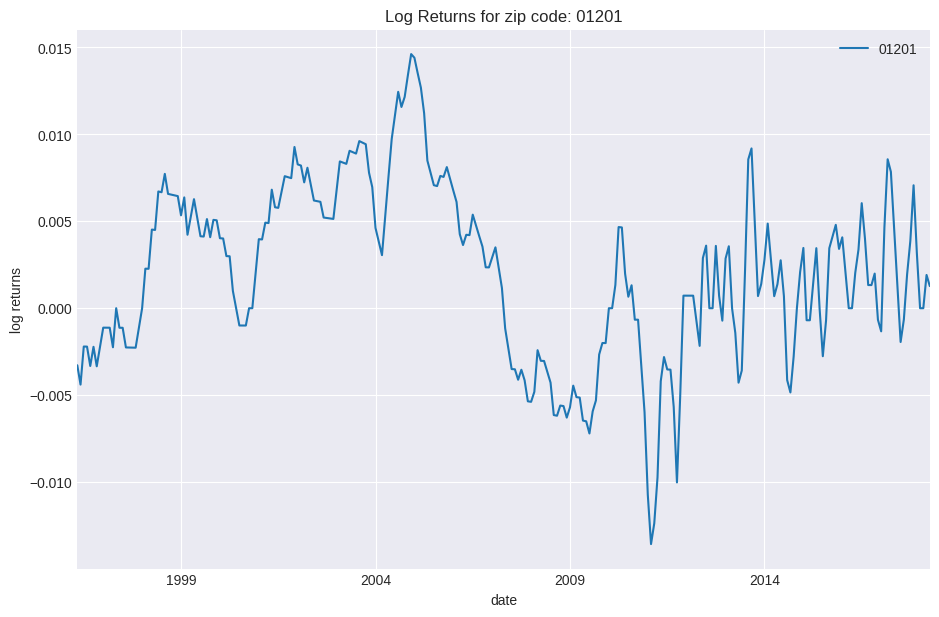

In [34]:
# Isolate time series of the prices for the first zip code in the data
first_zip_prices = groups.get_group(1201).set_index('date').value

# Calculate log returns of this price series
first_zip_log_returns = np.log(first_zip_prices).diff().dropna().asfreq('MS')
# Set name of series
first_zip_log_returns.name = 'log_returns'

# A look at our returns stream
first_zip_log_returns.plot(label='01201')
plt.ylabel('log returns')
plt.legend()
plt.show()

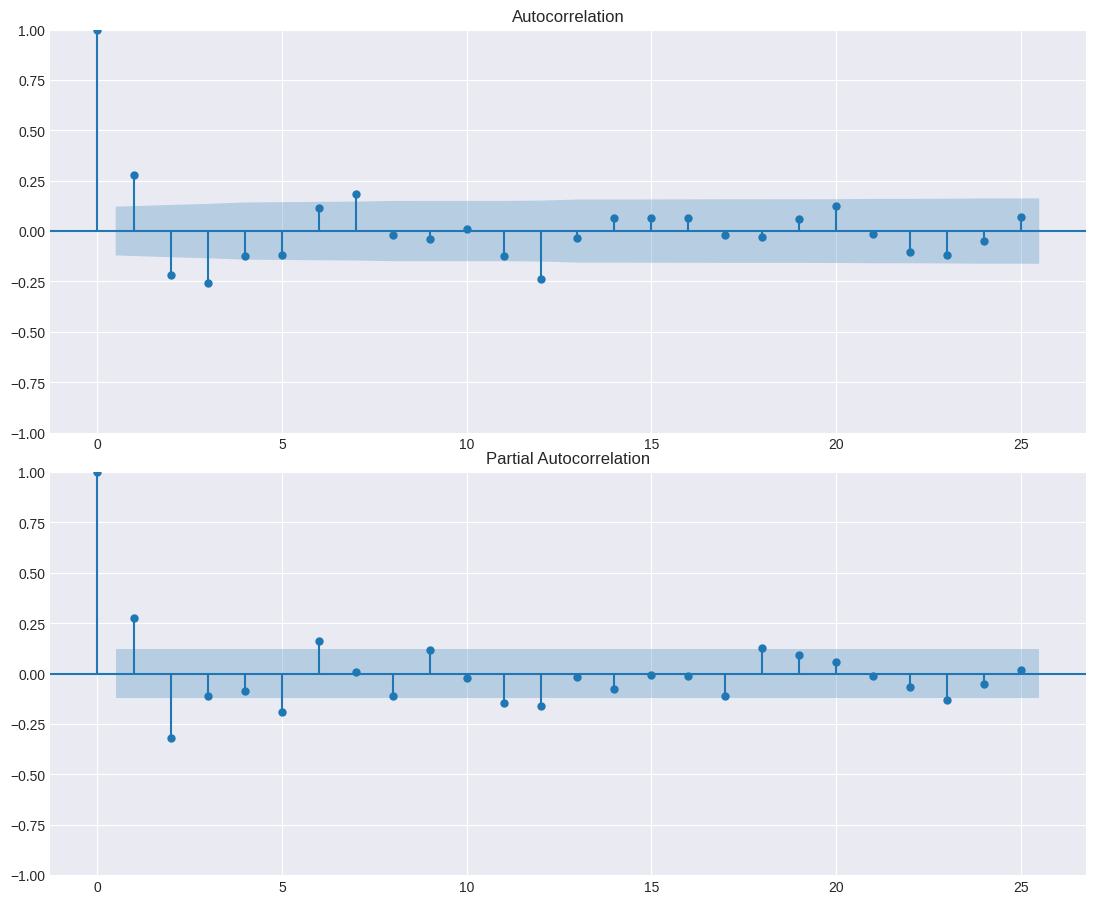

In [35]:
# use acf to figure out the parameters
fig, (ax1, ax2) = plt.subplots(2, figsize=(11,9))
plt.tight_layout()

plot_acf(first_zip_log_returns.diff().dropna(), ax=ax1);
plot_pacf(first_zip_log_returns.diff().dropna(), ax=ax2);
plt.show()

In [36]:
# using grid search tgo obtain best parameters
def get_best_param(data):
    results = dict()
    for p in range(3):
        for q in range(3):
            for P in range(3):
                for Q in range(3):
                    mod = SARIMAX(endog=data,
                                  order=(p,1,q), seasonal_order=(P,0,Q,12),
                                  enforce_invertibility=False, enforce_stationarity=False).fit(disp = False)
                    results[f"{p,1,q}x{P,0,Q,12}"] = mod.bic
    non_seasonal = eval(max(results, key=results.get).split("x")[0])
    seasonal = eval(max(results, key=results.get).split("x")[1])
    return non_seasonal, seasonal
## best model comes out to be (2,1,0)x(0,0,0,12) and (2, 1, 1)x(0, 0, 0, 12)

In [39]:
get_best_param(first_zip_log_returns)

((1, 1, 2), (2, 0, 2, 12))

In [43]:
# use auto-arima to find out best order of time series
pm.auto_arima(first_zip_log_returns, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=12, max_D=12,
                     error_action='ignore', information_criterion = 'bic')

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [46]:
mod_1 = SARIMAX(endog=first_zip_log_returns,
                order=(1,1,2), seasonal_order=(2,0,2, 12),
                enforce_invertibility=False, enforce_stationarity=False).fit(disp = False)

In [47]:
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        log_returns   No. Observations:                  264
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                1166.642
Date:                            Fri, 28 Apr 2023   AIC                          -2317.284
Time:                                    22:36:07   BIC                          -2289.574
Sample:                                05-01-1996   HQIC                         -2306.114
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8025      0.044     18.412      0.000       0.717       0.888
ma.L1         -0.4932      0.072     -6.889      0.000      -0.634      -0.353
ma.L2         -0.4665      0.068     -6.878      0.000      -0.599      -0.334
ar.S.L12      -0.2708      0.309     -0.877      0.380      -0.876       0.334
ar.S.L24      -0.0766      0.171     -0.447      0.655      -0.412       0.259
ma.S.L12      -0.1070      0.306     -0.350      0.727      -0.707       0.493
ma.S.L24      -0.1297      0.233     -0.557      0.578      -0.586       0.327
sigma2      2.936e-06   2.93e-07     10.026      0.000    2.36e-06    3.51e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.30   Prob(JB):                         0.97
Heteroskedasticity (H):               2.92   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

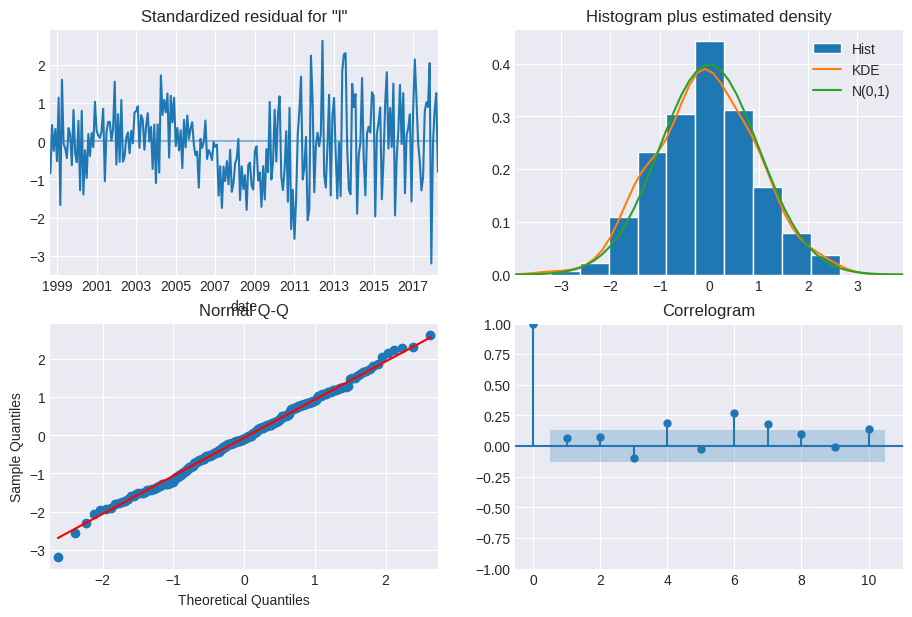

In [48]:
mod_1.plot_diagnostics();

In [37]:
mod_2 = SARIMAX(endog=first_zip_log_returns,
                order=(2,1,3), seasonal_order=(0,0,0,12),
                enforce_invertibility=False, enforce_stationarity=False).fit(disp = False)

In [39]:
np.var(mod_2.resid)

2.752654576002624e-06

In [38]:
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            log_returns   No. Observations:                  264
Model:               SARIMAX(2, 1, 3)   Log Likelihood                1291.236
Date:                Fri, 14 Apr 2023   AIC                          -2570.472
Time:                        17:35:12   BIC                          -2549.131
Sample:                    05-01-1996   HQIC                         -2561.891
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1330      0.205      0.649      0.517      -0.269       0.535
ar.L2         -0.0240      0.194     -0.124      0.902      -0.404       0.356
ma.L1          0.2275      0.196      1.161      0.246      -0.157       0.612
ma.L2         -0.2014      0.161     -1.253      0.210      -0.516       0.114
ma.L3         -0.3062      0.105     -2.919      0.004      -0.512      -0.101
sigma2      2.724e-06   2.11e-07     12.928      0.000    2.31e-06    3.14e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.82
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.38   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

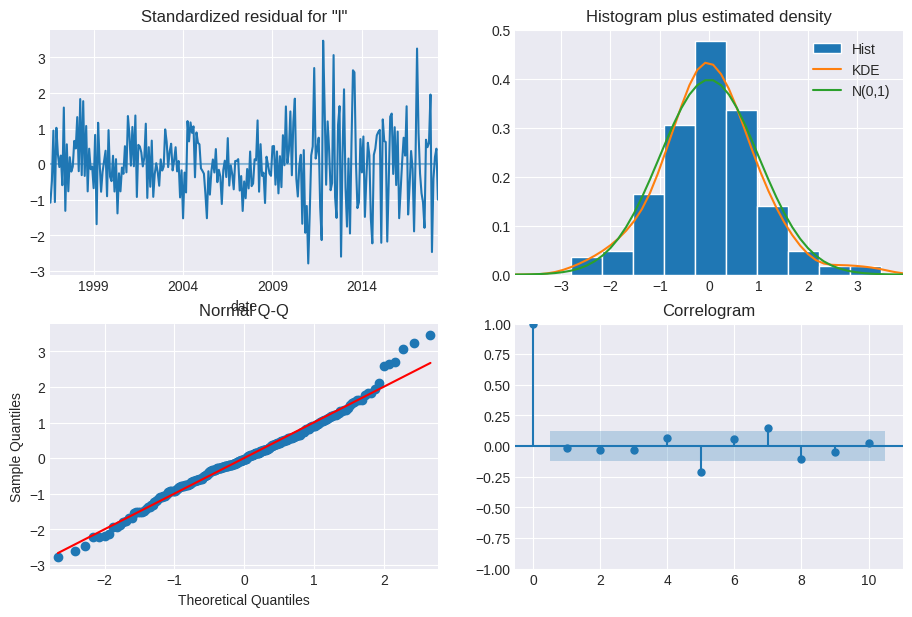

In [32]:
mod_2.plot_diagnostics();

In [9]:
# Create DataFrame to store results for comparison
results = pd.DataFrame(columns=['sigma2', 'predicted_mean', 'lower_conf_mean'])
i = 0

# Set periods_ahead to 60 months for 5 year forecast
periods_ahead = 60

# Iterate through all zip codes
for name, group in tqdm.tqdm(groups):
        
    # Filter out zip codes with missing data
    if group.set_index('date').value.isna().sum() > 0:
        print('Skipped due to incomplete data')
        continue
    
    # Get the value series
    value = group.set_index('date').value.dropna()
    
    # Filter out overly expensive zip codes
    if value[-1] > 500000:
        print('Skipped due to average sales price over $500,000')
        continue
    
    # Create the log returns series
    returns = np.log(value).diff().dropna().asfreq('MS')
    
    # Exception handling in case a model is not successfully made, move on
    try:
        non_seasonal, seasonal = get_best_param(returns)
        model = SARIMAX(returns, 
                        order=non_seasonal, 
                        seasonal_order=seasonal, 
                        enforce_invertibility=False,
                        enforce_stationarity=False).fit(disp = False)

        # Make forecast
        prediction = model.get_forecast(periods_ahead)
        pred_conf = prediction.conf_int()

        # Get forecast metrics for comparison
        predmean = prediction.predicted_mean.mean()
        low_conf_mean = pred_conf.iloc[:, 0].mean()

        # Store the metrics in DataFrame for later comparison
        results.loc[name, 'sigma2'] = np.var(model.resid)
        results.loc[name, 'predicted_mean'] = predmean
        results.loc[name, 'lower_conf_mean'] = low_conf_mean
        print(f"[model fit succesful...]")
        
    except:
        # Store NaNs if model was not successfully made
        results.loc[name, ['sigma2', 'predicted_mean', 'lower_conf_mean']] = np.NaN
        print(f"[model fit unsuccesful...]")

  0%|                                         | 1/556 [00:47<7:16:07, 47.15s/it]

[model fit succesful...]


  0%|▏                                        | 2/556 [01:36<7:25:13, 48.22s/it]

[model fit succesful...]


  1%|▏                                        | 3/556 [02:18<7:01:09, 45.70s/it]

[model fit succesful...]


  1%|▎                                        | 4/556 [02:57<6:36:10, 43.06s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


  1%|▍                                        | 6/556 [03:37<4:40:40, 30.62s/it]

[model fit succesful...]
Skipped due to incomplete data


  1%|▌                                        | 8/556 [04:42<4:48:49, 31.62s/it]

[model fit succesful...]


  2%|▋                                        | 9/556 [05:42<5:49:07, 38.30s/it]

[model fit succesful...]


  2%|▋                                       | 10/556 [06:46<6:46:55, 44.72s/it]

[model fit succesful...]


  2%|▊                                       | 11/556 [07:43<7:16:21, 48.04s/it]

[model fit succesful...]


  2%|▊                                       | 12/556 [09:00<8:26:28, 55.86s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


  3%|█                                       | 14/556 [10:14<7:09:14, 47.52s/it]

[model fit succesful...]


  3%|█                                       | 15/556 [11:15<7:38:36, 50.86s/it]

[model fit succesful...]


  3%|█▏                                      | 16/556 [12:34<8:41:35, 57.95s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


  3%|█▎                                      | 18/556 [13:40<7:05:11, 47.42s/it]

[model fit succesful...]


  3%|█▎                                      | 19/556 [14:21<6:51:47, 46.01s/it]

[model fit succesful...]


  4%|█▍                                      | 20/556 [15:19<7:16:38, 48.88s/it]

[model fit succesful...]


  4%|█▌                                      | 21/556 [16:04<7:07:11, 47.91s/it]

[model fit succesful...]


  4%|█▌                                      | 22/556 [17:03<7:33:29, 50.95s/it]

[model fit succesful...]


  4%|█▋                                      | 23/556 [17:52<7:28:35, 50.50s/it]

[model fit succesful...]
Skipped due to incomplete data
Skipped due to incomplete data
Skipped due to incomplete data
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to incomplete data


  5%|██▏                                     | 30/556 [19:17<3:15:01, 22.25s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


  6%|██▎                                     | 32/556 [20:41<3:53:15, 26.71s/it]

[model fit succesful...]


  6%|██▎                                     | 33/556 [21:37<4:29:59, 30.97s/it]

[model fit succesful...]


  6%|██▍                                     | 34/556 [22:40<5:16:04, 36.33s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


  6%|██▌                                     | 36/556 [24:14<5:44:55, 39.80s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


  7%|██▊                                     | 39/556 [25:10<4:28:17, 31.14s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 10%|███▉                                    | 54/556 [26:11<1:31:19, 10.92s/it]

[model fit succesful...]
Skipped due to incomplete data
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 12%|████▌                                   | 64/556 [26:51<1:06:15,  8.08s/it]

[model fit succesful...]


 12%|████▋                                   | 65/556 [27:30<1:20:06,  9.79s/it]

[model fit succesful...]


 12%|████▋                                   | 66/556 [28:28<1:48:58, 13.34s/it]

[model fit succesful...]


 12%|████▊                                   | 67/556 [29:35<2:31:08, 18.54s/it]

[model fit succesful...]


 12%|████▉                                   | 68/556 [30:57<3:32:56, 26.18s/it]

[model fit succesful...]


 12%|████▉                                   | 69/556 [31:59<4:13:57, 31.29s/it]

[model fit succesful...]


 13%|█████                                   | 70/556 [32:54<4:46:59, 35.43s/it]

[model fit succesful...]


 13%|█████                                   | 71/556 [33:38<5:00:05, 37.13s/it]

[model fit succesful...]


 13%|█████▏                                  | 72/556 [34:24<5:15:34, 39.12s/it]

[model fit succesful...]


 13%|█████▎                                  | 73/556 [35:10<5:27:39, 40.70s/it]

[model fit succesful...]


 13%|█████▎                                  | 74/556 [35:55<5:36:39, 41.91s/it]

[model fit succesful...]


 13%|█████▍                                  | 75/556 [36:34<5:30:39, 41.25s/it]

[model fit succesful...]


 14%|█████▍                                  | 76/556 [37:34<6:11:07, 46.39s/it]

[model fit succesful...]


 14%|█████▌                                  | 77/556 [38:28<6:27:57, 48.60s/it]

[model fit succesful...]


 14%|█████▌                                  | 78/556 [39:54<7:51:57, 59.24s/it]

[model fit succesful...]


 14%|█████▋                                  | 79/556 [41:16<8:43:51, 65.89s/it]

[model fit succesful...]


 14%|█████▊                                  | 80/556 [42:17<8:31:11, 64.44s/it]

[model fit succesful...]


 15%|█████▊                                  | 81/556 [43:04<7:48:34, 59.19s/it]

[model fit succesful...]


 15%|█████▉                                  | 82/556 [44:06<7:53:58, 60.00s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 16%|██████▎                                 | 87/556 [44:46<3:13:15, 24.72s/it]

[model fit succesful...]


 16%|██████▎                                 | 88/556 [45:41<3:51:33, 29.69s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 16%|██████▌                                 | 91/556 [46:29<3:05:33, 23.94s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 17%|██████▋                                 | 93/556 [47:23<3:11:25, 24.81s/it]

[model fit succesful...]


 17%|██████▊                                 | 94/556 [48:09<3:38:37, 28.39s/it]

[model fit succesful...]
Skipped due to incomplete data


 17%|██████▉                                 | 96/556 [49:00<3:30:24, 27.44s/it]

[model fit succesful...]


 17%|██████▉                                 | 97/556 [49:39<3:47:23, 29.72s/it]

[model fit succesful...]


 18%|███████                                 | 98/556 [50:29<4:19:30, 34.00s/it]

[model fit succesful...]


 18%|███████                                 | 99/556 [52:00<5:58:49, 47.11s/it]

[model fit succesful...]


 18%|███████                                | 100/556 [53:01<6:25:34, 50.73s/it]

[model fit succesful...]


 18%|███████                                | 101/556 [54:16<7:12:14, 57.00s/it]

[model fit succesful...]


 18%|███████▏                               | 102/556 [55:00<6:43:59, 53.39s/it]

[model fit succesful...]


 19%|███████▏                               | 103/556 [56:02<7:01:35, 55.84s/it]

[model fit succesful...]


 19%|███████▎                               | 104/556 [56:48<6:40:06, 53.11s/it]

[model fit succesful...]


 19%|███████▎                               | 105/556 [57:44<6:44:51, 53.86s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 19%|███████▌                               | 107/556 [58:48<5:29:07, 43.98s/it]

[model fit succesful...]


 19%|███████▌                               | 108/556 [59:32<5:28:38, 44.01s/it]

[model fit succesful...]


 20%|███████▎                             | 109/556 [1:00:09<5:14:46, 42.25s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 20%|███████▍                             | 111/556 [1:01:00<4:19:57, 35.05s/it]

[model fit succesful...]


 20%|███████▍                             | 112/556 [1:01:43<4:32:29, 36.82s/it]

[model fit succesful...]


 20%|███████▌                             | 113/556 [1:02:36<5:02:12, 40.93s/it]

[model fit succesful...]


 21%|███████▌                             | 114/556 [1:03:26<5:19:20, 43.35s/it]

[model fit succesful...]


 21%|███████▋                             | 115/556 [1:04:03<5:05:13, 41.53s/it]

[model fit succesful...]


 21%|███████▋                             | 116/556 [1:04:55<5:27:24, 44.65s/it]

[model fit succesful...]


 21%|███████▊                             | 117/556 [1:05:47<5:41:30, 46.68s/it]

[model fit succesful...]


 21%|███████▊                             | 118/556 [1:06:37<5:47:18, 47.58s/it]

[model fit succesful...]


 21%|███████▉                             | 119/556 [1:07:33<6:05:29, 50.18s/it]

[model fit succesful...]


 22%|███████▉                             | 120/556 [1:08:15<5:45:34, 47.56s/it]

[model fit succesful...]


 22%|████████                             | 121/556 [1:08:59<5:38:41, 46.72s/it]

[model fit succesful...]


 22%|████████                             | 122/556 [1:09:47<5:38:51, 46.85s/it]

[model fit succesful...]


 22%|████████▏                            | 123/556 [1:10:39<5:51:05, 48.65s/it]

[model fit succesful...]


 22%|████████▎                            | 124/556 [1:11:19<5:29:45, 45.80s/it]

[model fit succesful...]


 22%|████████▎                            | 125/556 [1:12:05<5:31:10, 46.10s/it]

[model fit succesful...]


 23%|████████▍                            | 126/556 [1:12:50<5:26:29, 45.56s/it]

[model fit succesful...]


 23%|████████▍                            | 127/556 [1:13:36<5:27:24, 45.79s/it]

[model fit succesful...]


 23%|████████▌                            | 128/556 [1:14:20<5:21:53, 45.13s/it]

[model fit succesful...]
Skipped due to incomplete data


 23%|████████▋                            | 130/556 [1:15:05<4:06:17, 34.69s/it]

[model fit succesful...]


 24%|████████▋                            | 131/556 [1:16:00<4:42:07, 39.83s/it]

[model fit succesful...]


 24%|████████▊                            | 132/556 [1:16:51<5:01:18, 42.64s/it]

[model fit succesful...]


 24%|████████▊                            | 133/556 [1:17:39<5:11:32, 44.19s/it]

[model fit succesful...]


 24%|████████▉                            | 134/556 [1:18:17<4:57:58, 42.37s/it]

[model fit succesful...]


 24%|████████▉                            | 135/556 [1:19:02<5:04:14, 43.36s/it]

[model fit succesful...]


 24%|█████████                            | 136/556 [1:19:42<4:55:23, 42.20s/it]

[model fit succesful...]


 25%|█████████                            | 137/556 [1:20:24<4:54:39, 42.20s/it]

[model fit succesful...]


 25%|█████████▏                           | 138/556 [1:21:16<5:13:53, 45.06s/it]

[model fit succesful...]


 25%|█████████▎                           | 139/556 [1:22:04<5:20:13, 46.07s/it]

[model fit succesful...]


 25%|█████████▎                           | 140/556 [1:22:49<5:16:56, 45.71s/it]

[model fit succesful...]


 25%|█████████▍                           | 141/556 [1:23:35<5:16:58, 45.83s/it]

[model fit succesful...]


 26%|█████████▍                           | 142/556 [1:24:22<5:17:12, 45.97s/it]

[model fit succesful...]


 26%|█████████▌                           | 143/556 [1:25:17<5:35:45, 48.78s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 26%|█████████▋                           | 145/556 [1:26:04<4:14:23, 37.14s/it]

[model fit succesful...]


 26%|█████████▋                           | 146/556 [1:26:52<4:32:34, 39.89s/it]

[model fit succesful...]


 26%|█████████▊                           | 147/556 [1:27:48<5:00:15, 44.05s/it]

[model fit succesful...]


 27%|█████████▊                           | 148/556 [1:28:46<5:25:59, 47.94s/it]

[model fit succesful...]


 27%|█████████▉                           | 149/556 [1:29:39<5:34:13, 49.27s/it]

[model fit succesful...]


 27%|█████████▉                           | 150/556 [1:30:24<5:25:37, 48.12s/it]

[model fit succesful...]


 27%|██████████                           | 151/556 [1:31:31<6:00:56, 53.47s/it]

[model fit succesful...]


 27%|██████████                           | 152/556 [1:32:23<5:56:16, 52.91s/it]

[model fit succesful...]


 28%|██████████▏                          | 153/556 [1:33:02<5:29:09, 49.01s/it]

[model fit succesful...]


 28%|██████████▏                          | 154/556 [1:33:47<5:19:10, 47.64s/it]

[model fit succesful...]


 28%|██████████▎                          | 155/556 [1:34:29<5:07:42, 46.04s/it]

[model fit succesful...]


 28%|██████████▍                          | 156/556 [1:35:18<5:13:39, 47.05s/it]

[model fit succesful...]


 28%|██████████▍                          | 157/556 [1:35:58<4:57:42, 44.77s/it]

[model fit succesful...]


 28%|██████████▌                          | 158/556 [1:36:43<4:58:44, 45.04s/it]

[model fit succesful...]


 29%|██████████▌                          | 159/556 [1:37:46<5:32:07, 50.20s/it]

[model fit succesful...]


 29%|██████████▋                          | 160/556 [1:38:35<5:29:09, 49.87s/it]

[model fit succesful...]


 29%|██████████▋                          | 161/556 [1:39:17<5:14:07, 47.72s/it]

[model fit succesful...]


 29%|██████████▊                          | 162/556 [1:40:11<5:24:47, 49.46s/it]

[model fit succesful...]


 29%|██████████▊                          | 163/556 [1:40:52<5:08:23, 47.08s/it]

[model fit succesful...]


 29%|██████████▉                          | 164/556 [1:41:37<5:02:16, 46.27s/it]

[model fit succesful...]


 30%|██████████▉                          | 165/556 [1:42:15<4:45:05, 43.75s/it]

[model fit succesful...]


 30%|███████████                          | 166/556 [1:42:56<4:40:28, 43.15s/it]

[model fit succesful...]


 30%|███████████                          | 167/556 [1:43:59<5:18:10, 49.08s/it]

[model fit succesful...]


 30%|███████████▏                         | 168/556 [1:44:43<5:05:53, 47.30s/it]

[model fit succesful...]


 30%|███████████▏                         | 169/556 [1:45:37<5:18:20, 49.36s/it]

[model fit succesful...]


 31%|███████████▎                         | 170/556 [1:46:20<5:05:20, 47.46s/it]

[model fit succesful...]


 31%|███████████▍                         | 171/556 [1:47:10<5:10:50, 48.44s/it]

[model fit succesful...]


 31%|███████████▍                         | 172/556 [1:48:12<5:35:27, 52.41s/it]

[model fit succesful...]


 31%|███████████▌                         | 173/556 [1:49:09<5:42:46, 53.70s/it]

[model fit succesful...]


 31%|███████████▌                         | 174/556 [1:49:59<5:35:27, 52.69s/it]

[model fit succesful...]


 31%|███████████▋                         | 175/556 [1:50:50<5:31:13, 52.16s/it]

[model fit succesful...]


 32%|███████████▋                         | 176/556 [1:51:51<5:46:48, 54.76s/it]

[model fit succesful...]


 32%|███████████▊                         | 177/556 [1:52:39<5:32:22, 52.62s/it]

[model fit succesful...]


 32%|███████████▊                         | 178/556 [1:53:25<5:20:28, 50.87s/it]

[model fit succesful...]


 32%|███████████▉                         | 179/556 [1:54:28<5:42:07, 54.45s/it]

[model fit succesful...]


 32%|███████████▉                         | 180/556 [1:55:27<5:49:59, 55.85s/it]

[model fit succesful...]


 33%|████████████                         | 181/556 [1:56:26<5:54:55, 56.79s/it]

[model fit succesful...]


 33%|████████████                         | 182/556 [1:57:09<5:27:15, 52.50s/it]

[model fit succesful...]


 33%|████████████▏                        | 183/556 [1:57:55<5:15:28, 50.75s/it]

[model fit succesful...]


 33%|████████████▏                        | 184/556 [1:58:56<5:33:36, 53.81s/it]

[model fit succesful...]


 33%|████████████▎                        | 185/556 [1:59:56<5:44:13, 55.67s/it]

[model fit succesful...]


 33%|████████████▍                        | 186/556 [2:00:47<5:33:33, 54.09s/it]

[model fit succesful...]


 34%|████████████▍                        | 187/556 [2:01:49<5:48:27, 56.66s/it]

[model fit succesful...]


 34%|████████████▌                        | 188/556 [2:02:42<5:39:45, 55.40s/it]

[model fit succesful...]


 34%|████████████▌                        | 189/556 [2:03:31<5:26:49, 53.43s/it]

[model fit succesful...]


 34%|████████████▋                        | 190/556 [2:04:25<5:27:29, 53.69s/it]

[model fit succesful...]


 34%|████████████▋                        | 191/556 [2:05:14<5:18:03, 52.28s/it]

[model fit succesful...]


 35%|████████████▊                        | 192/556 [2:05:59<5:03:38, 50.05s/it]

[model fit succesful...]


 35%|████████████▊                        | 193/556 [2:06:55<5:13:50, 51.87s/it]

[model fit succesful...]


 35%|████████████▉                        | 194/556 [2:07:40<5:01:29, 49.97s/it]

[model fit succesful...]


 35%|████████████▉                        | 195/556 [2:08:48<5:32:44, 55.30s/it]

[model fit succesful...]


 35%|█████████████                        | 196/556 [2:09:27<5:01:36, 50.27s/it]

[model fit succesful...]


 35%|█████████████                        | 197/556 [2:10:15<4:58:03, 49.81s/it]

[model fit succesful...]


 36%|█████████████▏                       | 198/556 [2:11:02<4:51:24, 48.84s/it]

[model fit succesful...]


 36%|█████████████▏                       | 199/556 [2:11:49<4:47:14, 48.28s/it]

[model fit succesful...]


 36%|█████████████▎                       | 200/556 [2:12:35<4:43:09, 47.72s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 37%|█████████████▌                       | 203/556 [2:14:00<3:36:35, 36.81s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 37%|█████████████▋                       | 205/556 [2:14:58<3:18:31, 33.94s/it]

[model fit succesful...]


 37%|█████████████▋                       | 206/556 [2:16:05<3:57:26, 40.70s/it]

[model fit succesful...]


 37%|█████████████▊                       | 207/556 [2:16:50<4:02:22, 41.67s/it]

[model fit succesful...]


 37%|█████████████▊                       | 208/556 [2:17:29<3:57:18, 40.92s/it]

[model fit succesful...]


 38%|█████████████▉                       | 209/556 [2:18:18<4:08:49, 43.03s/it]

[model fit succesful...]


 38%|█████████████▉                       | 210/556 [2:19:08<4:17:52, 44.72s/it]

[model fit succesful...]


 38%|██████████████                       | 211/556 [2:19:49<4:12:25, 43.90s/it]

[model fit succesful...]


 38%|██████████████                       | 212/556 [2:20:38<4:18:48, 45.14s/it]

[model fit succesful...]


 38%|██████████████▏                      | 213/556 [2:21:21<4:15:55, 44.77s/it]

[model fit succesful...]


 38%|██████████████▏                      | 214/556 [2:22:09<4:19:49, 45.58s/it]

[model fit succesful...]


 39%|██████████████▎                      | 215/556 [2:22:48<4:08:00, 43.64s/it]

[model fit succesful...]


 39%|██████████████▎                      | 216/556 [2:23:52<4:41:41, 49.71s/it]

[model fit succesful...]


 39%|██████████████▍                      | 217/556 [2:24:35<4:29:09, 47.64s/it]

[model fit succesful...]


 39%|██████████████▌                      | 218/556 [2:25:28<4:38:02, 49.36s/it]

[model fit succesful...]


 39%|██████████████▌                      | 219/556 [2:26:49<5:29:52, 58.73s/it]

[model fit succesful...]


 40%|██████████████▋                      | 220/556 [2:27:46<5:25:57, 58.21s/it]

[model fit succesful...]


 40%|██████████████▋                      | 221/556 [2:28:42<5:21:45, 57.63s/it]

[model fit succesful...]


 40%|██████████████▊                      | 222/556 [2:29:43<5:26:42, 58.69s/it]

[model fit succesful...]


 40%|██████████████▊                      | 223/556 [2:30:38<5:19:06, 57.50s/it]

[model fit succesful...]


 40%|██████████████▉                      | 224/556 [2:31:32<5:12:33, 56.49s/it]

[model fit succesful...]


 40%|██████████████▉                      | 225/556 [2:32:27<5:08:05, 55.85s/it]

[model fit succesful...]


 41%|███████████████                      | 226/556 [2:33:10<4:47:15, 52.23s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 41%|███████████████▏                     | 228/556 [2:34:00<3:36:08, 39.54s/it]

[model fit succesful...]


 41%|███████████████▏                     | 229/556 [2:34:35<3:29:56, 38.52s/it]

[model fit succesful...]


 41%|███████████████▎                     | 230/556 [2:35:12<3:26:56, 38.09s/it]

[model fit succesful...]


 42%|███████████████▎                     | 231/556 [2:35:59<3:39:45, 40.57s/it]

[model fit succesful...]


 42%|███████████████▍                     | 232/556 [2:36:39<3:37:04, 40.20s/it]

[model fit succesful...]


 42%|███████████████▌                     | 233/556 [2:37:29<3:52:48, 43.24s/it]

[model fit succesful...]


 42%|███████████████▌                     | 234/556 [2:38:14<3:53:38, 43.54s/it]

[model fit succesful...]


 42%|███████████████▋                     | 235/556 [2:38:57<3:52:39, 43.49s/it]

[model fit succesful...]


 42%|███████████████▋                     | 236/556 [2:39:39<3:48:57, 42.93s/it]

[model fit succesful...]


 43%|███████████████▊                     | 237/556 [2:40:18<3:42:34, 41.86s/it]

[model fit succesful...]


 43%|███████████████▊                     | 238/556 [2:41:04<3:47:56, 43.01s/it]

[model fit succesful...]


 43%|███████████████▉                     | 239/556 [2:41:53<3:57:10, 44.89s/it]

[model fit succesful...]


 43%|███████████████▉                     | 240/556 [2:42:38<3:55:59, 44.81s/it]

[model fit succesful...]


 43%|████████████████                     | 241/556 [2:43:39<4:20:27, 49.61s/it]

[model fit succesful...]


 44%|████████████████                     | 242/556 [2:44:21<4:08:40, 47.52s/it]

[model fit succesful...]


 44%|████████████████▏                    | 243/556 [2:45:16<4:19:10, 49.68s/it]

[model fit succesful...]


 44%|████████████████▏                    | 244/556 [2:45:51<3:56:00, 45.39s/it]

[model fit succesful...]


 44%|████████████████▎                    | 245/556 [2:46:29<3:42:51, 43.00s/it]

[model fit succesful...]


 44%|████████████████▎                    | 246/556 [2:47:12<3:42:52, 43.14s/it]

[model fit succesful...]


 44%|████████████████▍                    | 247/556 [2:47:52<3:36:20, 42.01s/it]

[model fit succesful...]


 45%|████████████████▌                    | 248/556 [2:48:34<3:36:22, 42.15s/it]

[model fit succesful...]


 45%|████████████████▌                    | 249/556 [2:49:22<3:44:47, 43.93s/it]

[model fit succesful...]


 45%|████████████████▋                    | 250/556 [2:50:06<3:43:59, 43.92s/it]

[model fit succesful...]


 45%|████████████████▋                    | 251/556 [2:50:49<3:41:56, 43.66s/it]

[model fit succesful...]


 45%|████████████████▊                    | 252/556 [2:51:34<3:43:55, 44.20s/it]

[model fit succesful...]


 46%|████████████████▊                    | 253/556 [2:52:14<3:36:32, 42.88s/it]

[model fit succesful...]


 46%|████████████████▉                    | 254/556 [2:52:59<3:38:57, 43.50s/it]

[model fit succesful...]


 46%|████████████████▉                    | 255/556 [2:53:52<3:51:33, 46.16s/it]

[model fit succesful...]


 46%|█████████████████                    | 256/556 [2:54:38<3:50:39, 46.13s/it]

[model fit succesful...]


 46%|█████████████████                    | 257/556 [2:55:24<3:50:54, 46.34s/it]

[model fit succesful...]


 46%|█████████████████▏                   | 258/556 [2:56:04<3:40:05, 44.31s/it]

[model fit succesful...]


 47%|█████████████████▏                   | 259/556 [2:56:54<3:47:19, 45.93s/it]

[model fit succesful...]


 47%|█████████████████▎                   | 260/556 [2:57:48<3:58:21, 48.31s/it]

[model fit succesful...]


 47%|█████████████████▎                   | 261/556 [2:58:27<3:44:12, 45.60s/it]

[model fit succesful...]


 47%|█████████████████▍                   | 262/556 [2:59:03<3:29:36, 42.78s/it]

[model fit succesful...]


 47%|█████████████████▌                   | 263/556 [3:00:09<4:02:54, 49.74s/it]

[model fit succesful...]


 47%|█████████████████▌                   | 264/556 [3:01:00<4:03:14, 49.98s/it]

[model fit succesful...]


 48%|█████████████████▋                   | 265/556 [3:01:47<3:58:06, 49.09s/it]

[model fit succesful...]


 48%|█████████████████▋                   | 266/556 [3:02:38<4:00:04, 49.67s/it]

[model fit succesful...]


 48%|█████████████████▊                   | 267/556 [3:03:29<4:01:13, 50.08s/it]

[model fit succesful...]


 48%|█████████████████▊                   | 268/556 [3:04:07<3:43:41, 46.60s/it]

[model fit succesful...]


 48%|█████████████████▉                   | 269/556 [3:05:02<3:55:00, 49.13s/it]

[model fit succesful...]


 49%|█████████████████▉                   | 270/556 [3:05:48<3:49:01, 48.05s/it]

[model fit succesful...]


 49%|██████████████████                   | 271/556 [3:06:28<3:36:27, 45.57s/it]

[model fit succesful...]


 49%|██████████████████                   | 272/556 [3:07:15<3:39:00, 46.27s/it]

[model fit succesful...]


 49%|██████████████████▏                  | 273/556 [3:08:18<4:01:58, 51.30s/it]

[model fit succesful...]


 49%|██████████████████▏                  | 274/556 [3:09:10<4:01:01, 51.28s/it]

[model fit succesful...]


 49%|██████████████████▎                  | 275/556 [3:09:54<3:50:28, 49.21s/it]

[model fit succesful...]


 50%|██████████████████▎                  | 276/556 [3:10:34<3:36:51, 46.47s/it]

[model fit succesful...]


 50%|██████████████████▍                  | 277/556 [3:11:28<3:46:13, 48.65s/it]

[model fit succesful...]


 50%|██████████████████▌                  | 278/556 [3:12:13<3:40:46, 47.65s/it]

[model fit succesful...]


 50%|██████████████████▌                  | 279/556 [3:13:14<3:57:43, 51.49s/it]

[model fit succesful...]


 50%|██████████████████▋                  | 280/556 [3:13:47<3:31:53, 46.06s/it]

[model fit succesful...]


 51%|██████████████████▋                  | 281/556 [3:14:51<3:56:16, 51.55s/it]

[model fit succesful...]


 51%|██████████████████▊                  | 282/556 [3:15:39<3:49:36, 50.28s/it]

[model fit succesful...]


 51%|██████████████████▊                  | 283/556 [3:16:17<3:31:47, 46.55s/it]

[model fit succesful...]
Skipped due to incomplete data


 51%|██████████████████▉                  | 285/556 [3:17:19<2:58:15, 39.47s/it]

[model fit succesful...]


 51%|███████████████████                  | 286/556 [3:18:02<3:01:14, 40.28s/it]

[model fit succesful...]


 52%|███████████████████                  | 287/556 [3:19:01<3:22:56, 45.27s/it]

[model fit succesful...]


 52%|███████████████████▏                 | 288/556 [3:19:58<3:36:46, 48.53s/it]

[model fit succesful...]


 52%|███████████████████▏                 | 289/556 [3:20:51<3:40:31, 49.56s/it]

[model fit succesful...]


 52%|███████████████████▎                 | 290/556 [3:22:21<4:31:31, 61.25s/it]

[model fit succesful...]


 52%|███████████████████▎                 | 291/556 [3:23:03<4:06:00, 55.70s/it]

[model fit succesful...]


 53%|███████████████████▍                 | 292/556 [3:23:38<3:38:27, 49.65s/it]

[model fit succesful...]


 53%|███████████████████▍                 | 293/556 [3:24:40<3:53:10, 53.20s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to incomplete data
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 54%|███████████████████▊                 | 298/556 [3:25:27<1:40:58, 23.48s/it]

[model fit succesful...]


 54%|███████████████████▉                 | 299/556 [3:26:24<2:04:21, 29.03s/it]

[model fit succesful...]


 54%|███████████████████▉                 | 300/556 [3:27:13<2:19:37, 32.73s/it]

[model fit succesful...]


 54%|████████████████████                 | 301/556 [3:28:34<3:02:03, 42.84s/it]

[model fit succesful...]


 54%|████████████████████                 | 302/556 [3:29:59<3:43:00, 52.68s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 55%|████████████████████▏                | 304/556 [3:30:39<2:47:02, 39.77s/it]

[model fit succesful...]


 55%|████████████████████▎                | 305/556 [3:31:52<3:17:12, 47.14s/it]

[model fit succesful...]


 55%|████████████████████▎                | 306/556 [3:32:34<3:10:55, 45.82s/it]

[model fit succesful...]


 55%|████████████████████▍                | 307/556 [3:33:16<3:05:41, 44.75s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 56%|████████████████████▌                | 309/556 [3:34:19<2:41:43, 39.29s/it]

[model fit succesful...]


 56%|████████████████████▋                | 310/556 [3:35:02<2:44:18, 40.07s/it]

[model fit succesful...]


 56%|████████████████████▋                | 311/556 [3:36:38<3:40:01, 53.89s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 56%|████████████████████▉                | 314/556 [3:37:24<2:17:40, 34.13s/it]

[model fit succesful...]


 57%|████████████████████▉                | 315/556 [3:38:08<2:24:40, 36.02s/it]

[model fit succesful...]


 57%|█████████████████████                | 316/556 [3:38:56<2:34:11, 38.55s/it]

[model fit succesful...]


 57%|█████████████████████                | 317/556 [3:39:36<2:35:02, 38.92s/it]

[model fit succesful...]


 57%|█████████████████████▏               | 318/556 [3:40:35<2:55:08, 44.15s/it]

[model fit succesful...]


 57%|█████████████████████▏               | 319/556 [3:41:17<2:51:30, 43.42s/it]

[model fit succesful...]


 58%|█████████████████████▎               | 320/556 [3:42:10<3:01:30, 46.14s/it]

[model fit succesful...]


 58%|█████████████████████▎               | 321/556 [3:42:52<2:56:44, 45.13s/it]

[model fit succesful...]
Skipped due to incomplete data


 58%|█████████████████████▍               | 323/556 [3:43:41<2:18:45, 35.73s/it]

[model fit succesful...]


 58%|█████████████████████▌               | 324/556 [3:44:33<2:33:49, 39.78s/it]

[model fit succesful...]


 58%|█████████████████████▋               | 325/556 [3:45:20<2:39:45, 41.50s/it]

[model fit succesful...]


 59%|█████████████████████▋               | 326/556 [3:46:05<2:43:20, 42.61s/it]

[model fit succesful...]


 59%|█████████████████████▊               | 327/556 [3:46:56<2:51:18, 44.88s/it]

[model fit succesful...]


 59%|█████████████████████▊               | 328/556 [3:47:50<3:00:46, 47.57s/it]

[model fit succesful...]


 59%|█████████████████████▉               | 329/556 [3:48:42<3:03:59, 48.63s/it]

[model fit succesful...]


 59%|█████████████████████▉               | 330/556 [3:49:32<3:04:34, 49.00s/it]

[model fit succesful...]


 60%|██████████████████████               | 331/556 [3:50:16<2:58:53, 47.71s/it]

[model fit succesful...]


 60%|██████████████████████               | 332/556 [3:50:55<2:48:49, 45.22s/it]

[model fit succesful...]


 60%|██████████████████████▏              | 333/556 [3:51:58<3:07:43, 50.51s/it]

[model fit succesful...]


 60%|██████████████████████▏              | 334/556 [3:53:06<3:25:48, 55.62s/it]

[model fit succesful...]


 60%|██████████████████████▎              | 335/556 [3:53:54<3:15:59, 53.21s/it]

[model fit succesful...]


 60%|██████████████████████▎              | 336/556 [3:54:33<2:59:34, 48.98s/it]

[model fit succesful...]


 61%|██████████████████████▍              | 337/556 [3:55:18<2:55:01, 47.95s/it]

[model fit succesful...]


 61%|██████████████████████▍              | 338/556 [3:55:59<2:46:16, 45.76s/it]

[model fit succesful...]


 61%|██████████████████████▌              | 339/556 [3:56:50<2:51:04, 47.30s/it]

[model fit succesful...]


 61%|██████████████████████▋              | 340/556 [3:57:40<2:53:53, 48.30s/it]

[model fit succesful...]


 61%|██████████████████████▋              | 341/556 [3:58:39<3:04:17, 51.43s/it]

[model fit succesful...]


 62%|██████████████████████▊              | 342/556 [3:59:43<3:17:06, 55.26s/it]

[model fit succesful...]


 62%|██████████████████████▊              | 343/556 [4:00:30<3:06:57, 52.67s/it]

[model fit succesful...]


 62%|██████████████████████▉              | 344/556 [4:02:05<3:51:19, 65.47s/it]

[model fit succesful...]


 62%|██████████████████████▉              | 345/556 [4:02:56<3:34:05, 60.88s/it]

[model fit succesful...]


 62%|███████████████████████              | 346/556 [4:03:46<3:22:32, 57.87s/it]

[model fit succesful...]


 62%|███████████████████████              | 347/556 [4:04:49<3:26:47, 59.37s/it]

[model fit succesful...]


 63%|███████████████████████▏             | 348/556 [4:05:31<3:08:00, 54.23s/it]

[model fit succesful...]


 63%|███████████████████████▏             | 349/556 [4:06:13<2:53:55, 50.41s/it]

[model fit succesful...]


 63%|███████████████████████▎             | 350/556 [4:07:05<2:54:42, 50.89s/it]

[model fit succesful...]


 63%|███████████████████████▎             | 351/556 [4:07:49<2:46:45, 48.81s/it]

[model fit succesful...]


 63%|███████████████████████▍             | 352/556 [4:08:40<2:48:06, 49.44s/it]

[model fit succesful...]


 63%|███████████████████████▍             | 353/556 [4:09:33<2:50:34, 50.42s/it]

[model fit succesful...]


 64%|███████████████████████▌             | 354/556 [4:10:24<2:50:29, 50.64s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 64%|███████████████████████▋             | 356/556 [4:11:02<2:00:08, 36.04s/it]

[model fit succesful...]


 64%|███████████████████████▊             | 357/556 [4:11:47<2:07:09, 38.34s/it]

[model fit succesful...]


 64%|███████████████████████▊             | 358/556 [4:12:30<2:10:18, 39.49s/it]

[model fit succesful...]


 65%|███████████████████████▉             | 359/556 [4:13:15<2:14:46, 41.05s/it]

[model fit succesful...]


 65%|███████████████████████▉             | 360/556 [4:13:58<2:16:14, 41.71s/it]

[model fit succesful...]


 65%|████████████████████████             | 361/556 [4:14:48<2:22:59, 44.00s/it]

[model fit succesful...]


 65%|████████████████████████             | 362/556 [4:15:27<2:17:02, 42.38s/it]

[model fit succesful...]


 65%|████████████████████████▏            | 363/556 [4:16:07<2:14:52, 41.93s/it]

[model fit succesful...]


 65%|████████████████████████▏            | 364/556 [4:16:51<2:15:41, 42.40s/it]

[model fit succesful...]


 66%|████████████████████████▎            | 365/556 [4:17:40<2:21:14, 44.37s/it]

[model fit succesful...]


 66%|████████████████████████▎            | 366/556 [4:18:29<2:25:13, 45.86s/it]

[model fit succesful...]


 66%|████████████████████████▍            | 367/556 [4:19:07<2:17:08, 43.54s/it]

[model fit succesful...]


 66%|████████████████████████▍            | 368/556 [4:19:56<2:21:13, 45.07s/it]

[model fit succesful...]


 66%|████████████████████████▌            | 369/556 [4:20:40<2:19:31, 44.77s/it]

[model fit succesful...]


 67%|████████████████████████▌            | 370/556 [4:21:27<2:20:43, 45.40s/it]

[model fit succesful...]


 67%|████████████████████████▋            | 371/556 [4:22:30<2:36:30, 50.76s/it]

[model fit succesful...]


 67%|████████████████████████▊            | 372/556 [4:23:13<2:28:04, 48.28s/it]

[model fit succesful...]


 67%|████████████████████████▊            | 373/556 [4:23:55<2:21:16, 46.32s/it]

[model fit succesful...]


 67%|████████████████████████▉            | 374/556 [4:24:46<2:25:28, 47.96s/it]

[model fit succesful...]


 67%|████████████████████████▉            | 375/556 [4:25:38<2:27:46, 48.99s/it]

[model fit succesful...]


 68%|█████████████████████████            | 376/556 [4:26:16<2:17:02, 45.68s/it]

[model fit succesful...]


 68%|█████████████████████████            | 377/556 [4:27:06<2:20:30, 47.10s/it]

[model fit succesful...]


 68%|█████████████████████████▏           | 378/556 [4:28:04<2:29:19, 50.33s/it]

[model fit succesful...]


 68%|█████████████████████████▏           | 379/556 [4:28:42<2:17:59, 46.78s/it]

[model fit succesful...]


 68%|█████████████████████████▎           | 380/556 [4:29:24<2:12:55, 45.32s/it]

[model fit succesful...]


 69%|█████████████████████████▎           | 381/556 [4:30:11<2:13:12, 45.67s/it]

[model fit succesful...]


 69%|█████████████████████████▍           | 382/556 [4:31:03<2:18:10, 47.65s/it]

[model fit succesful...]


 69%|█████████████████████████▍           | 383/556 [4:31:54<2:20:12, 48.63s/it]

[model fit succesful...]


 69%|█████████████████████████▌           | 384/556 [4:32:33<2:11:08, 45.75s/it]

[model fit succesful...]


 69%|█████████████████████████▌           | 385/556 [4:33:37<2:25:31, 51.06s/it]

[model fit succesful...]


 69%|█████████████████████████▋           | 386/556 [4:34:31<2:27:57, 52.22s/it]

[model fit succesful...]


 70%|█████████████████████████▊           | 387/556 [4:35:26<2:29:06, 52.94s/it]

[model fit succesful...]


 70%|█████████████████████████▊           | 388/556 [4:36:11<2:21:39, 50.59s/it]

[model fit succesful...]


 70%|█████████████████████████▉           | 389/556 [4:37:03<2:22:07, 51.06s/it]

[model fit succesful...]


 70%|█████████████████████████▉           | 390/556 [4:37:45<2:13:10, 48.14s/it]

[model fit succesful...]


 70%|██████████████████████████           | 391/556 [4:38:34<2:13:38, 48.60s/it]

[model fit succesful...]


 71%|██████████████████████████           | 392/556 [4:39:28<2:17:12, 50.20s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 71%|██████████████████████████▏          | 394/556 [4:40:22<1:46:15, 39.36s/it]

[model fit succesful...]


 71%|██████████████████████████▎          | 395/556 [4:41:06<1:48:38, 40.49s/it]

[model fit succesful...]


 71%|██████████████████████████▎          | 396/556 [4:41:52<1:52:20, 42.13s/it]

[model fit succesful...]


 71%|██████████████████████████▍          | 397/556 [4:42:49<2:01:47, 45.96s/it]

[model fit succesful...]


 72%|██████████████████████████▍          | 398/556 [4:43:38<2:03:24, 46.86s/it]

[model fit succesful...]


 72%|██████████████████████████▌          | 399/556 [4:44:22<2:00:53, 46.20s/it]

[model fit succesful...]


 72%|██████████████████████████▌          | 400/556 [4:45:01<1:54:26, 44.02s/it]

[model fit succesful...]


 72%|██████████████████████████▋          | 401/556 [4:45:45<1:54:04, 44.16s/it]

[model fit succesful...]


 72%|██████████████████████████▊          | 402/556 [4:46:32<1:54:58, 44.80s/it]

[model fit succesful...]


 72%|██████████████████████████▊          | 403/556 [4:47:18<1:55:24, 45.26s/it]

[model fit succesful...]


 73%|██████████████████████████▉          | 404/556 [4:47:59<1:51:22, 43.96s/it]

[model fit succesful...]


 73%|██████████████████████████▉          | 405/556 [4:48:42<1:49:42, 43.59s/it]

[model fit succesful...]


 73%|███████████████████████████          | 406/556 [4:49:28<1:50:58, 44.39s/it]

[model fit succesful...]


 73%|███████████████████████████          | 407/556 [4:50:15<1:52:12, 45.18s/it]

[model fit succesful...]


 73%|███████████████████████████▏         | 408/556 [4:51:20<2:06:24, 51.24s/it]

[model fit succesful...]


 74%|███████████████████████████▏         | 409/556 [4:52:10<2:04:24, 50.78s/it]

[model fit succesful...]


 74%|███████████████████████████▎         | 410/556 [4:53:24<2:20:00, 57.54s/it]

[model fit succesful...]


 74%|███████████████████████████▎         | 411/556 [4:54:18<2:16:40, 56.56s/it]

[model fit succesful...]


 74%|███████████████████████████▍         | 412/556 [4:55:25<2:23:33, 59.82s/it]

[model fit succesful...]


 74%|███████████████████████████▍         | 413/556 [4:56:25<2:22:17, 59.70s/it]

[model fit succesful...]


 74%|███████████████████████████▌         | 414/556 [4:57:17<2:16:19, 57.60s/it]

[model fit succesful...]


 75%|███████████████████████████▌         | 415/556 [4:57:58<2:03:15, 52.45s/it]

[model fit succesful...]


 75%|███████████████████████████▋         | 416/556 [4:58:47<2:00:19, 51.57s/it]

[model fit succesful...]


 75%|███████████████████████████▊         | 417/556 [4:59:43<2:02:08, 52.72s/it]

[model fit succesful...]


 75%|███████████████████████████▊         | 418/556 [5:00:26<1:54:52, 49.95s/it]

[model fit succesful...]


 75%|███████████████████████████▉         | 419/556 [5:01:09<1:49:11, 47.82s/it]

[model fit succesful...]


 76%|███████████████████████████▉         | 420/556 [5:02:19<2:03:29, 54.48s/it]

[model fit succesful...]


 76%|████████████████████████████         | 421/556 [5:03:03<1:55:39, 51.41s/it]

[model fit succesful...]


 76%|████████████████████████████         | 422/556 [5:03:41<1:45:57, 47.44s/it]

[model fit succesful...]


 76%|████████████████████████████▏        | 423/556 [5:04:21<1:40:09, 45.18s/it]

[model fit succesful...]


 76%|████████████████████████████▏        | 424/556 [5:05:17<1:46:01, 48.19s/it]

[model fit succesful...]


 76%|████████████████████████████▎        | 425/556 [5:06:04<1:44:49, 48.01s/it]

[model fit succesful...]


 77%|████████████████████████████▎        | 426/556 [5:06:41<1:36:46, 44.66s/it]

[model fit succesful...]


 77%|████████████████████████████▍        | 427/556 [5:07:23<1:34:27, 43.93s/it]

[model fit succesful...]


 77%|████████████████████████████▍        | 428/556 [5:08:20<1:42:04, 47.85s/it]

[model fit succesful...]


 77%|████████████████████████████▌        | 429/556 [5:08:55<1:32:48, 43.85s/it]

[model fit succesful...]


 77%|████████████████████████████▌        | 430/556 [5:09:41<1:33:28, 44.51s/it]

[model fit succesful...]


 78%|████████████████████████████▋        | 431/556 [5:10:28<1:34:41, 45.45s/it]

[model fit succesful...]


 78%|████████████████████████████▋        | 432/556 [5:11:10<1:31:27, 44.26s/it]

[model fit succesful...]


 78%|████████████████████████████▊        | 433/556 [5:11:52<1:29:35, 43.70s/it]

[model fit succesful...]


 78%|████████████████████████████▉        | 434/556 [5:12:41<1:31:53, 45.20s/it]

[model fit succesful...]


 78%|████████████████████████████▉        | 435/556 [5:13:19<1:27:04, 43.18s/it]

[model fit succesful...]


 78%|█████████████████████████████        | 436/556 [5:13:59<1:24:11, 42.10s/it]

[model fit succesful...]


 79%|█████████████████████████████        | 437/556 [5:14:42<1:23:53, 42.30s/it]

[model fit succesful...]


 79%|█████████████████████████████▏       | 438/556 [5:15:20<1:20:58, 41.18s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 79%|█████████████████████████████▎       | 440/556 [5:16:22<1:10:29, 36.46s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 80%|███████████████████████████████▎       | 447/556 [5:16:56<26:03, 14.34s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 81%|███████████████████████████████▌       | 450/556 [5:17:42<25:50, 14.63s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 81%|███████████████████████████████▋       | 452/556 [5:18:20<27:12, 15.70s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 82%|███████████████████████████████▉       | 455/556 [5:19:01<25:17, 15.02s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 83%|████████████████████████████████▏      | 459/556 [5:19:43<21:23, 13.24s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 83%|████████████████████████████████▍      | 463/556 [5:20:38<20:48, 13.42s/it]

[model fit succesful...]


 83%|████████████████████████████████▌      | 464/556 [5:21:21<25:39, 16.74s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 84%|████████████████████████████████▋      | 466/556 [5:22:17<29:18, 19.54s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 85%|████████████████████████████████▉      | 470/556 [5:23:02<23:10, 16.17s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 85%|█████████████████████████████████▎     | 475/556 [5:23:49<17:54, 13.27s/it]

[model fit succesful...]


 86%|█████████████████████████████████▍     | 476/556 [5:25:00<26:01, 19.51s/it]

[model fit succesful...]


 86%|█████████████████████████████████▍     | 477/556 [5:25:56<31:58, 24.28s/it]

[model fit succesful...]


 86%|█████████████████████████████████▌     | 478/556 [5:26:41<36:03, 27.73s/it]

[model fit succesful...]


 86%|█████████████████████████████████▌     | 479/556 [5:27:40<42:59, 33.50s/it]

[model fit succesful...]


 86%|█████████████████████████████████▋     | 480/556 [5:28:33<47:40, 37.64s/it]

[model fit succesful...]


 87%|█████████████████████████████████▋     | 481/556 [5:29:15<48:15, 38.60s/it]

[model fit succesful...]


 87%|█████████████████████████████████▊     | 482/556 [5:30:05<51:06, 41.44s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 89%|██████████████████████████████████▌    | 493/556 [5:31:14<14:08, 13.47s/it]

[model fit succesful...]


 89%|██████████████████████████████████▋    | 494/556 [5:31:56<16:40, 16.14s/it]

[model fit succesful...]


 89%|██████████████████████████████████▋    | 495/556 [5:32:55<21:29, 21.13s/it]

[model fit succesful...]


 89%|██████████████████████████████████▊    | 496/556 [5:33:35<23:52, 23.87s/it]

[model fit succesful...]


 89%|██████████████████████████████████▊    | 497/556 [5:34:46<31:21, 31.89s/it]

[model fit succesful...]


 90%|██████████████████████████████████▉    | 498/556 [5:35:42<35:29, 36.72s/it]

[model fit succesful...]


 90%|███████████████████████████████████    | 499/556 [5:36:23<35:40, 37.55s/it]

[model fit succesful...]


 90%|███████████████████████████████████    | 500/556 [5:37:03<35:43, 38.28s/it]

[model fit succesful...]


 90%|███████████████████████████████████▏   | 501/556 [5:37:40<34:39, 37.81s/it]

[model fit succesful...]


 90%|███████████████████████████████████▏   | 502/556 [5:38:19<34:26, 38.27s/it]

[model fit succesful...]


 90%|███████████████████████████████████▎   | 503/556 [5:38:56<33:24, 37.81s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 92%|███████████████████████████████████▊   | 511/556 [5:39:42<10:04, 13.43s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 92%|███████████████████████████████████▉   | 513/556 [5:40:23<10:45, 15.02s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 93%|████████████████████████████████████▍  | 519/556 [5:41:33<08:15, 13.40s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 95%|█████████████████████████████████████  | 529/556 [5:42:31<04:12,  9.35s/it]

[model fit succesful...]


 95%|█████████████████████████████████████▏ | 530/556 [5:43:12<05:00, 11.57s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 96%|█████████████████████████████████████▎ | 532/556 [5:43:57<05:21, 13.39s/it]

[model fit succesful...]


 96%|█████████████████████████████████████▍ | 533/556 [5:44:45<06:35, 17.19s/it]

[model fit succesful...]


 96%|█████████████████████████████████████▍ | 534/556 [5:45:27<07:30, 20.46s/it]

[model fit succesful...]


 96%|█████████████████████████████████████▌ | 535/556 [5:46:14<08:36, 24.60s/it]

[model fit succesful...]


 96%|█████████████████████████████████████▌ | 536/556 [5:47:00<09:30, 28.55s/it]

[model fit succesful...]


 97%|█████████████████████████████████████▋ | 537/556 [5:47:39<09:44, 30.76s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 97%|█████████████████████████████████████▉ | 540/556 [5:48:29<06:26, 24.13s/it]

[model fit succesful...]


 97%|█████████████████████████████████████▉ | 541/556 [5:49:44<08:22, 33.49s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000


 98%|██████████████████████████████████████ | 543/556 [5:50:34<06:37, 30.56s/it]

[model fit succesful...]


 98%|██████████████████████████████████████▏| 544/556 [5:51:40<07:30, 37.51s/it]

[model fit succesful...]
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000
Skipped due to average sales price over $500,000


 99%|██████████████████████████████████████▋| 552/556 [5:52:23<01:01, 15.30s/it]

[model fit succesful...]


 99%|██████████████████████████████████████▊| 553/556 [5:53:42<01:06, 22.23s/it]

[model fit succesful...]


100%|██████████████████████████████████████▊| 554/556 [5:54:36<00:53, 26.61s/it]

[model fit succesful...]


100%|██████████████████████████████████████▉| 555/556 [5:55:29<00:30, 30.93s/it]

[model fit succesful...]


100%|███████████████████████████████████████| 556/556 [5:56:49<00:00, 38.51s/it]

[model fit succesful...]


In [10]:
results.to_csv('Data/zip_code_analysis.csv')

In [9]:
results = pd.read_csv('Data/zip_code_analysis.csv', index_col = 0)

In [10]:
results.head()

,sigma2,predicted_mean,lower_conf_mean
1201,0.000003,0.002049,-0.013214
1960,0.000004,0.002376,-0.013100
2148,0.000004,0.005389,-0.011563
2151,0.000004,0.011246,-0.007659
2169,0.000003,0.005988,-0.008165


In [11]:
# Sort results by mean of lower confidence limit
sorted_results = results.sort_values(by='lower_conf_mean', ascending=False)
sorted_results.head()

,sigma2,predicted_mean,lower_conf_mean
28205,0.000005,0.013835,-0.001576
28227,0.000003,0.014862,-0.001880
78758,0.000005,0.013248,-0.003056
37129,0.000002,0.010149,-0.003669
37130,0.000003,0.010824,-0.004176


In [12]:
# Take our top 200 contenders and create empty dataframe for zipcode info
top200 = sorted_results.iloc[:200]
zipcode_info = pd.DataFrame()

In [13]:
# Generate a zipcode info dataframe row by row
for zipcode in top200.index:
    group = groups.get_group(zipcode)
    group['Region Name'] = group['Metro'] + ', ' + group['State']
    zipcode_info = pd.concat([zipcode_info,
                              pd.DataFrame(group.iloc[0][['Region Name', 
                                                          'zipcode', 
                                                          'City', 
                                                          'State']]).T
                             ], axis=0)

In [14]:
zipcode_info.head()

,Region Name,zipcode,City,State
409,"Charlotte, NC",28205,Charlotte,NC
472,"Charlotte, NC",28227,Mint Hill,NC
422,"Austin, TX",78758,Austin,TX
505,"Nashville, TN",37129,Murfreesboro,TN
234,"Nashville, TN",37130,Murfreesboro,TN


In [15]:
p2r.head()

,Region Name,Region Name (group),National Average,P2R,Zhvi
0,"Yuma, AZ",Other,11.44,12.18,"$134,200"
1,"Yuba City, CA",Other,11.44,14.90,"$249,400"
2,"Youngstown, OH",Other,11.44,8.86,"$85,400"
3,"York, PA",Other,11.44,10.55,"$163,600"
4,"Yakima, WA",Other,11.44,13.51,"$181,700"


In [16]:
# Merge the desired P2R columns to the zipcode info dataframe
zipcode_info = zipcode_info.merge(p2r[['Region Name', 'P2R', 'National Average']], 
                                  left_on='Region Name',
                                  right_on='Region Name',
                                  how='left'
                                 )

In [17]:
zipcode_info.head(10)

,Region Name,zipcode,City,State,P2R,National Average
0,"Charlotte, NC",28205,Charlotte,NC,11.30,11.44
1,"Charlotte, NC",28227,Mint Hill,NC,11.30,11.44
2,"Austin, TX",78758,Austin,TX,12.70,11.44
3,"Nashville, TN",37129,Murfreesboro,TN,12.05,11.44
4,"Nashville, TN",37130,Murfreesboro,TN,12.05,11.44
5,"San Antonio, TX",78254,San Antonio,TX,9.87,11.44
6,"Durham, NC",27713,Durham,NC,12.39,11.44
7,"Nashville, TN",37013,Nashville,TN,12.05,11.44
8,"Atlanta, GA",30080,Smyrna,GA,10.93,11.44
9,"San Antonio, TX",78130,New Braunfels,TX,9.87,11.44


In [18]:
# Merge the zipcode info to our top 200 results and set index to zipcode
results_new = top200.merge(zipcode_info,
                           left_index=True,
                           right_on='zipcode', how = 'right',
                          ).set_index('zipcode')

In [35]:
results_new.head(20)

,sigma2,predicted_mean,lower_conf_mean,Region Name,City,State,P2R,National Average
zipcode,,,,,,,,
28205,0.000005,0.013835,-0.001576,"Charlotte, NC",Charlotte,NC,11.30,11.44
28227,0.000003,0.014862,-0.001880,"Charlotte, NC",Mint Hill,NC,11.30,11.44
78758,0.000005,0.013248,-0.003056,"Austin, TX",Austin,TX,12.70,11.44
37129,0.000002,0.010149,-0.003669,"Nashville, TN",Murfreesboro,TN,12.05,11.44
37130,0.000003,0.010824,-0.004176,"Nashville, TN",Murfreesboro,TN,12.05,11.44
78254,0.000002,0.002308,-0.004194,"San Antonio, TX",San Antonio,TX,9.87,11.44
27713,0.000001,0.004663,-0.004426,"Durham, NC",Durham,NC,12.39,11.44
37013,0.000003,0.007588,-0.004511,"Nashville, TN",Nashville,TN,12.05,11.44
30080,0.000004,0.012332,-0.004591,"Atlanta, GA",Smyrna,GA,10.93,11.44


In [19]:
# Find top contenders with better than average P2R
profitable_rent = results_new[results_new['P2R'] < results_new['National Average']]

# View top 10
profitable_rent.head(10)

,sigma2,predicted_mean,lower_conf_mean,Region Name,City,State,P2R,National Average
zipcode,,,,,,,,
28205,0.000005,0.013835,-0.001576,"Charlotte, NC",Charlotte,NC,11.30,11.44
28227,0.000003,0.014862,-0.001880,"Charlotte, NC",Mint Hill,NC,11.30,11.44
78254,0.000002,0.002308,-0.004194,"San Antonio, TX",San Antonio,TX,9.87,11.44
30080,0.000004,0.012332,-0.004591,"Atlanta, GA",Smyrna,GA,10.93,11.44
78130,0.000004,0.005089,-0.004786,"San Antonio, TX",New Braunfels,TX,9.87,11.44
75228,0.000006,0.012960,-0.005476,"Dallas-Fort Worth, TX",Dallas,TX,10.69,11.44
77845,0.000002,0.005890,-0.005698,"College Station, TX",College Station,TX,9.51,11.44
75052,0.000005,0.009769,-0.006197,"Dallas-Fort Worth, TX",Grand Prairie,TX,10.69,11.44
75056,0.000003,0.007222,-0.006302,"Dallas-Fort Worth, TX",The Colony,TX,10.69,11.44


In [55]:
profitable_rent.to_csv('Data/profitable_rent.csv')

In [18]:
view_zip = groups.get_group(78130).set_index('date').value
view_zip_returns = np.log(view_zip).diff().dropna().asfreq('MS')
view_zip_returns.name = 'new_braunfels_log_returns'

In [42]:
auto_arima_model = pm.auto_arima(view_zip_returns, information_criterion = 'bic')
seasonal, non_seasonal = auto_arima_model.get_params()['seasonal_order'], auto_arima_model.get_params()['order']

In [43]:
model = SARIMAX(view_zip_returns,
                order = non_seasonal,
                seasonal_order = seasonal,
                enforce_invertibility = False,
                enforce_stationarity = False).fit(disp = False)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_braunfels_log_returns   No. Observations:                  264
Model:                      SARIMAX(0, 1, 3)   Log Likelihood                1261.440
Date:                       Sun, 16 Apr 2023   AIC                          -2514.879
Time:                               16:20:58   BIC                          -2500.652
Sample:                           05-01-1996   HQIC                         -2509.159
                                - 04-01-2018                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3747      0.050      7.569      0.000       0.278       0.472
ma.L2         -0.5123      0.050    -10.315      0.000      -0.610      -0.415
ma.L3         -0.3844      0.047     -8.225      0.000      -0.476      -0.293
sigma2      3.418e-06   2.02e-07     16.885      0.000    3.02e-06    3.82e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               116.21
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.37   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

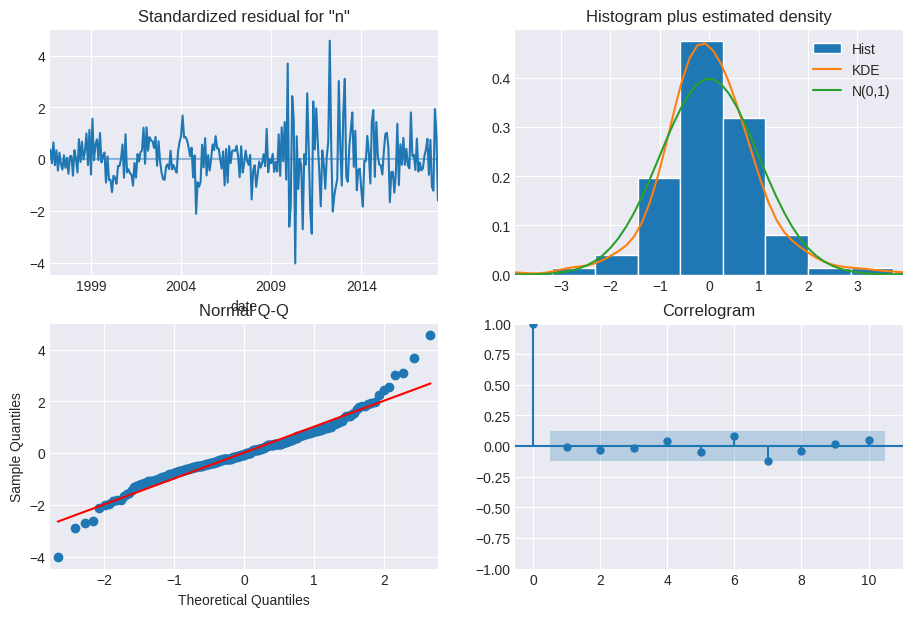

In [45]:
model.plot_diagnostics();

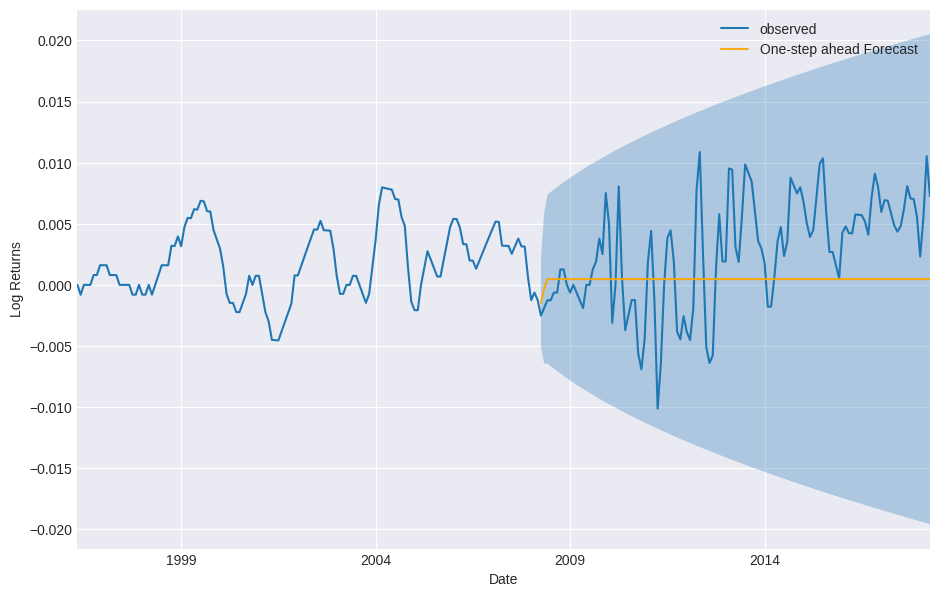

In [46]:
## new_braunfels_in-sample_forecast
# Get predictions
pred = model.get_prediction(dynamic='2008-04-01')
pred_conf = pred.conf_int().loc['2008-04':]
# Plot observed values
ax = view_zip_returns.plot(label='observed')
# Plot predicted values
pred.predicted_mean.loc['2008-04':].plot(ax=ax, label='One-step ahead Forecast', color='orange', alpha=0.9)
# Plot the range for confidence intervals
ax.fill_between(pred_conf.index, 
                pred_conf.iloc[:, 0], 
                pred_conf.iloc[:, 1],
                alpha=0.3
               )
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Log Returns')
plt.legend()
plt.show()

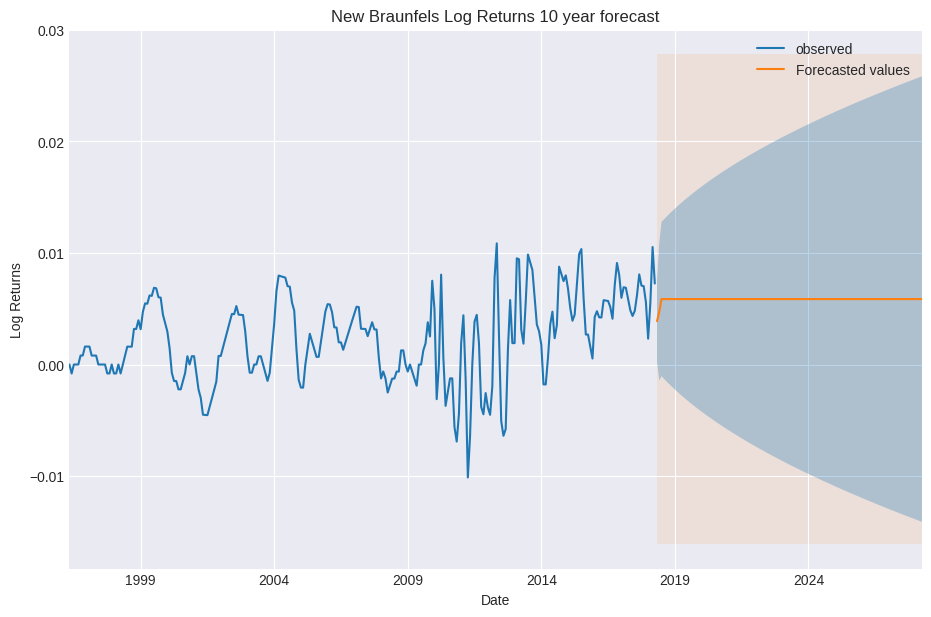

In [47]:
## new_braunfels out-sample_forecast
periods_ahead = 120
constant = pd.Series(np.ones(periods_ahead))

# Get forecast
prediction = model.get_forecast(periods_ahead, exog=constant)

# Get confidence intervals of forecast
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = view_zip_returns.plot(label='observed')
prediction.predicted_mean.plot(label='Forecasted values', ax=ax)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1],
                alpha=0.3
               )

ax.fill_betweenx(ax.get_ylim(), pred_conf.index[0], pred_conf.index[-1],
                 alpha=0.1,
                 zorder=-1
                )

ax.set_title('New Braunfels Log Returns 10 year forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Log Returns')
plt.legend()
plt.show()